In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df = pd.read_csv("/content/drive/MyDrive/中興大學-資料探勘/fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [167]:
df_text = df.copy()

In [168]:
df_text.fillna(" ",inplace = True)
df_text.drop(df_text.iloc[:,0:5], axis = 1, inplace = True)
df_text.drop(df_text.iloc[:,4:-1], axis = 1, inplace = True)

In [169]:
df_text

,company_profile,description,requirements,benefits,fraudulent
0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0
1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0
3,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0
...,...,...,...,...,...
17875,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0
17876,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0
17877,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0
17878,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0


In [6]:
df['text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function']

In [7]:
df.drop(['title','location','department','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function'], axis = 1, inplace = True)

In [8]:
df.drop(['salary_range','job_id'], axis = 1, inplace = True)

In [9]:
df['text_len'] = df.text.str.len()

In [10]:
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text,text_len
0,0,1,0,0,"Marketing Intern US, NY, New York Marketing We...",2710
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ...",6211
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA...",2665
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash...",5539
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS...",4042


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [12]:
text = "The! film, Pulp. Fiction*(#) was released in year 1994"
result = re.sub(r"[^a-zA-Z]", ' ' , text)
result

'The  film  Pulp  Fiction     was released in year     '

In [13]:
result.lower()

'the  film  pulp  fiction     was released in year     '

In [14]:
result.split()

['The', 'film', 'Pulp', 'Fiction', 'was', 'released', 'in', 'year']

In [15]:
result = result.lower().split()
result

['the', 'film', 'pulp', 'fiction', 'was', 'released', 'in', 'year']

In [16]:
lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize('cars', 'n'))
print(lemmatizer.lemmatize('men', 'n'))

# lemmatize verbs
print(lemmatizer.lemmatize('running', 'v'))
print(lemmatizer.lemmatize('ate', 'v'))

# lemmatize adjectives
print(lemmatizer.lemmatize('saddest', 'a'))
print(lemmatizer.lemmatize('fancier', 'a'))

car
men
run
eat
sad
fancy


In [17]:
test2 = 'football is a family of team sports that involve, to varying degrees, kicking a ball to score a goal'
result2 = test2.lower().split()
result2

['football',
 'is',
 'a',
 'family',
 'of',
 'team',
 'sports',
 'that',
 'involve,',
 'to',
 'varying',
 'degrees,',
 'kicking',
 'a',
 'ball',
 'to',
 'score',
 'a',
 'goal']

In [18]:
nltk_stopwords = nltk.corpus.stopwords.words('english')
for word in result2:
  if not word in nltk_stopwords:
    lemmatizer.lemmatize(word)
print(result2)

['football', 'is', 'a', 'family', 'of', 'team', 'sports', 'that', 'involve,', 'to', 'varying', 'degrees,', 'kicking', 'a', 'ball', 'to', 'score', 'a', 'goal']


In [19]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# raw_text = vectorizer.fit_transform([result])

In [20]:
# vectorizer.vocabulary_

In [21]:
df['text'][0]

"Marketing Intern US, NY, New York Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food communi

In [22]:
df['text'].str.len()

0        2710
1        6211
2        2665
3        5539
4        4042
         ... 
17875    5374
17876    4829
17877    2852
17878    1305
17879    4676
Name: text, Length: 17880, dtype: int64

In [23]:
lemmatizer = WordNetLemmatizer()
nltk_stopwords = nltk.corpus.stopwords.words('english')

def text_cleaning(text):
    text = re.sub("[^a-zA-Z]", " ", text) # 去除標點符號和數字
    text = text.lower() # 轉為英文小寫
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if not word in nltk_stopwords]
    return ' '.join(text)  

In [24]:
len(nltk_stopwords)

179

In [25]:
nltk_stopwords[:15]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

In [26]:
df['clean_text'] = df['text'].apply(text_cleaning)

In [27]:
df['clean_text_len'] = df['clean_text'].str.len()

In [28]:
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text,text_len,clean_text,clean_text_len
0,0,1,0,0,"Marketing Intern US, NY, New York Marketing We...",2710,marketing intern u ny new york marketing food ...,2030
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ...",6211,customer service cloud video production nz auc...,4356
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA...",2665,commissioning machinery assistant cma u ia wev...,1991
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash...",5539,account executive washington dc u dc washingto...,4462
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS...",4042,bill review manager u fl fort worth spotsource...,3291


In [29]:
df['clean_text'][0]

'marketing intern u ny new york marketing food created groundbreaking award winning cooking site support connect celebrate home cook give everything need one place top editorial business engineering team focused using technology find new better way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish well known professional like mario batali gwyneth paltrow danny meyer partnership whole food market random house food named best food website james beard foundation iacp featured new york time npr pando daily techcrunch today show located chelsea new york city food fast growing james beard award winning online food community crowd sourced curated recipe hub currently interviewing full part time unpaid intern work small team editor executive developer new york city headquarters reproducing repackaging existing food content number partner site huffington post yahoo buzzfeed various conten

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
tt = vectorizer.fit_transform(df['text'])

In [31]:
df[df["fraudulent"]==1]['text']

98       IC&E Technician US, , Stocton, CA Oil & Energy...
144      Forward Cap.       The group has raised a fund...
173      Technician Instrument & Controls  US Power Pla...
180      Sales Executive PK, SD, Karachi Sales   Sales ...
215      IC&E Technician Mt Poso US, CA, Bakersfield, C...
                               ...                        
17827    Student Positions Part-Time and Full-Time. US,...
17828    Sales Associate AU, NSW, Sydney Sales and Mark...
17829    Android Developer PL, MZ, Warsaw     inFullMob...
17830    Payroll Clerk  US, NY, New York     JOB DESCRI...
17831    Furniture mover US, IL, Chicago   Anthony Warr...
Name: text, Length: 866, dtype: object

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
real_text = vectorizer.fit_transform(df.text)

In [33]:
vectorizer.vocabulary_

{'marketing': 52654,
 'intern': 45287,
 'us': 96794,
 'ny': 58552,
 'new': 57800,
 'york': 101430,
 'we': 99062,
 're': 72610,
 'food52': 36309,
 'and': 5730,
 've': 97583,
 'created': 20814,
 'groundbreaking': 39318,
 'award': 9269,
 'winning': 99964,
 'cooking': 20064,
 'site': 81736,
 'support': 87413,
 'connect': 19137,
 'celebrate': 14610,
 'home': 41232,
 'cooks': 20071,
 'give': 38477,
 'them': 90975,
 'everything': 32627,
 'they': 91166,
 'need': 57150,
 'in': 43066,
 'one': 59621,
 'place': 64828,
 'have': 40289,
 'top': 92387,
 'editorial': 28469,
 'business': 12851,
 'engineering': 30228,
 'team': 89105,
 'focused': 36177,
 'on': 59558,
 'using': 97060,
 'technology': 90054,
 'to': 91962,
 'find': 35569,
 'better': 10890,
 'ways': 99008,
 'people': 63268,
 'around': 7671,
 'their': 90964,
 'specific': 84155,
 'food': 36308,
 'interests': 45195,
 'offer': 59025,
 'superb': 87171,
 'highly': 40897,
 'curated': 21548,
 'information': 43887,
 'about': 2432,
 'attract': 8716,
 't

In [34]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-12-13 17:55:45--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.68.102, 74.125.68.113, 74.125.68.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.68.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m9ari0s51k0v9gj2bm5h6ckbghqnga4g/1670954100000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=41fc1ab2-5c7f-4735-b7da-7425bec18eb0 [following]
--2022-12-13 17:55:50--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m9ari0s51k0v9gj2bm5h6ckbghqnga4g/1670954100000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=41fc1ab2-5c7f-4735-b7da-7425bec18eb0
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.12.132, 2404:6800:4003:c11::84
Connecting to doc-0k-9o-

In [35]:
from collections import Counter

words = df[df["fraudulent"]==0]['text'].apply(lambda x: [word.lower() for word in x.split()])
real_post = Counter()

for post in words:
    real_post.update(post)
    
print(real_post.most_common(100))

[('and', 349341), ('to', 197377), ('the', 193216), ('of', 148250), ('a', 138530), ('in', 121257), ('with', 87528), ('for', 80248), ('our', 62905), ('is', 61971), ('we', 56774), ('are', 43746), ('you', 43488), ('as', 38328), ('be', 37054), ('on', 35980), ('or', 33303), ('that', 32678), ('will', 32367), ('work', 30785), ('an', 30159), ('experience', 27871), ('have', 26918), ('team', 25121), ('your', 22374), ('all', 19981), ('at', 19293), ('business', 18769), ('new', 17904), ('by', 17592), ('from', 17349), ('customer', 17302), ('their', 16350), ('this', 16266), ('sales', 15840), ('company', 15058), ('working', 14199), ('&amp;', 14188), ('management', 13805), ('services', 13494), ('-', 13157), ('development', 12964), ('full-time', 12750), ('service', 12434), ('marketing', 12289), ('it', 12288), ('looking', 11739), ('other', 11574), ('who', 11549), ('technology', 11023), ('degree', 10874), ('people', 10386), ('software', 10358), ('us,', 10330), ('skills', 10312), ('product', 10242), ('can',

In [36]:
real_post_com = pd.DataFrame(real_post.most_common(30))
real_post_com

,0,1
0,and,349341
1,to,197377
2,the,193216
3,of,148250
4,a,138530
5,in,121257
6,with,87528
7,for,80248
8,our,62905
9,is,61971


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text major ticklabel objects>)

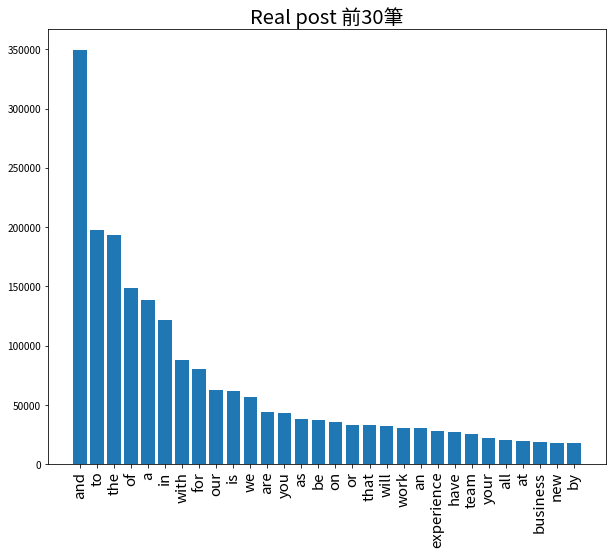

In [37]:
plt.figure(figsize=(10,8))
plt.title('Real post 前30筆', size=20)
plt.bar(real_post_com.iloc[:,0],real_post_com.iloc[:,1])
plt.xticks(rotation=90, size=15)

In [38]:
from collections import Counter

words = df[df["fraudulent"]==1]['text'].apply(lambda x: [word.lower() for word in x.split()])
fake_post = Counter()

for post in words:
    fake_post.update(post)
    
print(fake_post.most_common())

[('and', 13748), ('to', 7487), ('the', 6439), ('of', 4857), ('a', 4311), ('in', 4223), ('with', 3281), ('for', 3165), ('is', 1993), ('are', 1734), ('you', 1676), ('we', 1584), ('or', 1538), ('work', 1476), ('on', 1384), ('our', 1378), ('as', 1376), ('be', 1240), ('experience', 1191), ('your', 1146), ('&amp;', 982), ('from', 927), ('-', 894), ('an', 878), ('all', 875), ('that', 832), ('this', 821), ('have', 805), ('will', 803), ('customer', 744), ('us,', 725), ('at', 681), ('service', 681), ('skills', 664), ('company', 628), ('engineering', 600), ('team', 586), ('other', 583), ('full-time', 576), ('new', 571), ('by', 570), ('their', 568), ('business', 564), ('data', 560), ('project', 553), ('management', 548), ('ability', 542), ('services', 526), ('high', 519), ('position', 505), ('time', 495), ('information', 458), ('looking', 455), ('working', 452), ('years', 452), ('within', 441), ('must', 429), ('knowledge', 429), ('sales', 428), ('can', 425), ('oil', 423), ('solutions', 410), ('tec

In [39]:
fake_post_com = pd.DataFrame(fake_post.most_common(30))
fake_post_com

,0,1
0,and,13748
1,to,7487
2,the,6439
3,of,4857
4,a,4311
5,in,4223
6,with,3281
7,for,3165
8,is,1993
9,are,1734


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text major ticklabel objects>)

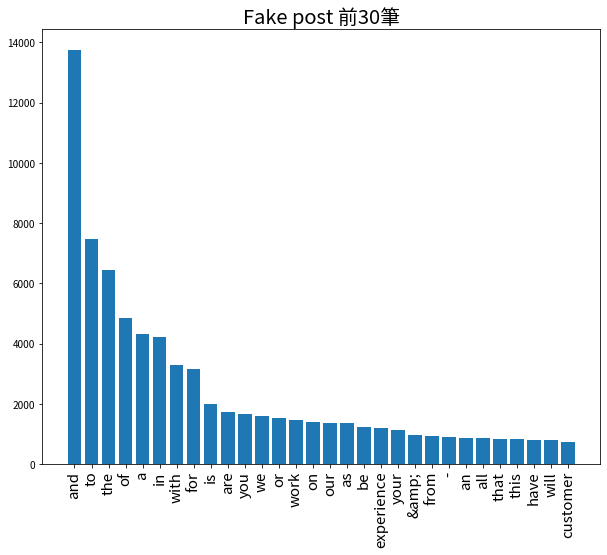

In [40]:
plt.figure(figsize=(10,8))
plt.title('Fake post 前30筆', size=20)
plt.bar(fake_post_com.iloc[:,0],fake_post_com.iloc[:,1])
plt.xticks(rotation=90, size=15)

In [41]:
df['text'].str.len()

0        2710
1        6211
2        2665
3        5539
4        4042
         ... 
17875    5374
17876    4829
17877    2852
17878    1305
17879    4676
Name: text, Length: 17880, dtype: int64

In [170]:
df_text['company_profile_len'] = df_text.company_profile.str.len()
df_text['description_len'] = df_text.description.str.len()
df_text['requirements_len'] = df_text.requirements.str.len()
df_text['benefits_len'] = df_text.benefits.str.len()

In [171]:
df_text.head()

,company_profile,description,requirements,benefits,fraudulent,company_profile_len,description_len,requirements_len,benefits_len
0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,885,905,852,1
1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1286,2077,1433,1292
2,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,879,355,1363,1
3,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,614,2600,1429,782
4,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1628,1520,757,21


In [44]:
df['text_len'] = df['text'].str.len()
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text,text_len,clean_text,clean_text_len
0,0,1,0,0,"Marketing Intern US, NY, New York Marketing We...",2710,marketing intern u ny new york marketing food ...,2030
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ...",6211,customer service cloud video production nz auc...,4356
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA...",2665,commissioning machinery assistant cma u ia wev...,1991
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash...",5539,account executive washington dc u dc washingto...,4462
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS...",4042,bill review manager u fl fort worth spotsource...,3291


In [172]:
df_text.head()

,company_profile,description,requirements,benefits,fraudulent,company_profile_len,description_len,requirements_len,benefits_len
0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,885,905,852,1
1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1286,2077,1433,1292
2,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,879,355,1363,1
3,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,614,2600,1429,782
4,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1628,1520,757,21


In [173]:
company_profile_0, description_0, requirements_0, benefits_0 = df_text[df_text.fraudulent == 0].company_profile_len, df_text[df_text.fraudulent == 0].description_len, df_text[df_text.fraudulent == 0].requirements_len, df_text[df_text.fraudulent == 0].benefits_len
company_profile_1, description_1, requirements_1, benefits_1 = df_text[df_text.fraudulent == 1].company_profile_len, df_text[df_text.fraudulent == 1].description_len, df_text[df_text.fraudulent == 1].requirements_len, df_text[df_text.fraudulent == 1].benefits_len

<function matplotlib.pyplot.show(*args, **kw)>

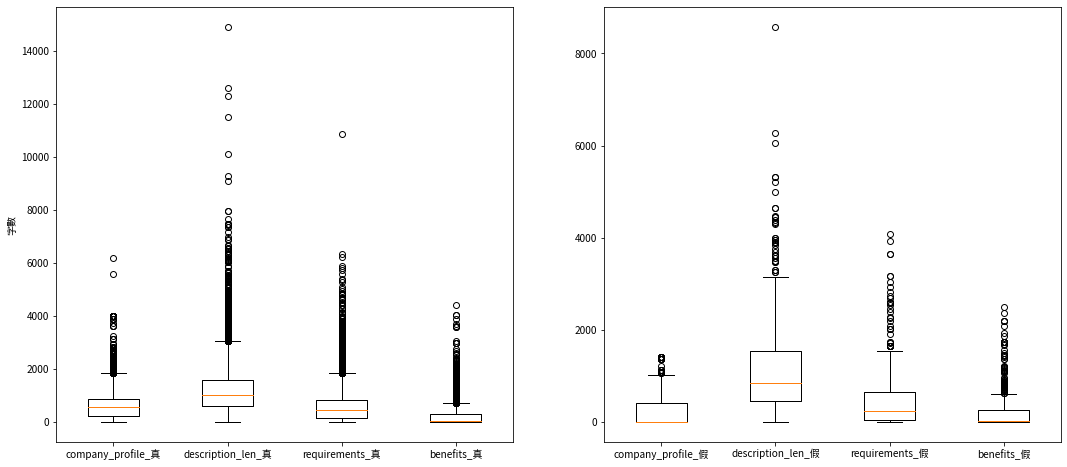

In [174]:
plt.figure(figsize = (18,8))

label_0 = ['company_profile_真', 'description_len_真', 'requirements_真', 'benefits_真']
label_1 = ['company_profile_假', 'description_len_假', 'requirements_假', 'benefits_假']

plt.subplot(121)
plt.boxplot([company_profile_0, description_0, requirements_0, benefits_0],labels=label_0)
plt.ylabel('字數')
plt.subplot(122)
plt.boxplot([company_profile_1, description_1, requirements_1, benefits_1],labels=label_1)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

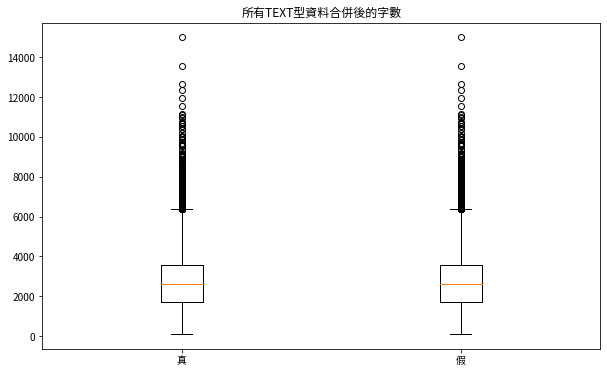

In [47]:
plt.figure(figsize = (10,6))
label = ['真','假']
plt.title('所有TEXT型資料合併後的字數')
fraudulent_0,fraudulent_1 = df[df.fraudulent == 0].text_len, df[df.fraudulent == 0].text_len 
plt.boxplot([fraudulent_0,fraudulent_0],labels=label)
plt.show

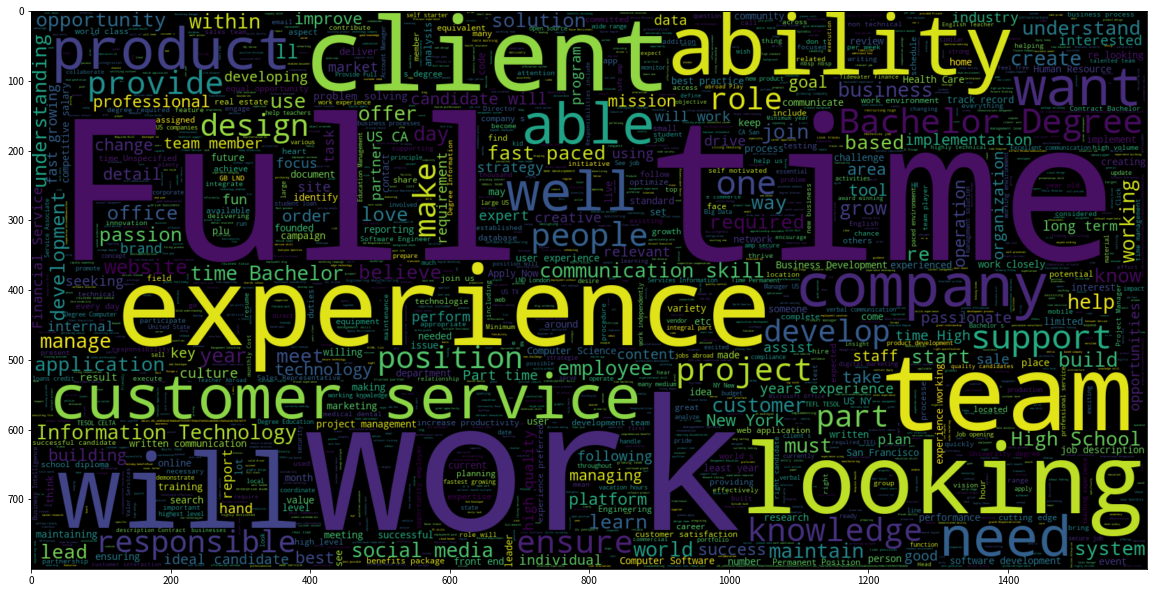

In [48]:
plt.figure(figsize = (20,20)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.fraudulent == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

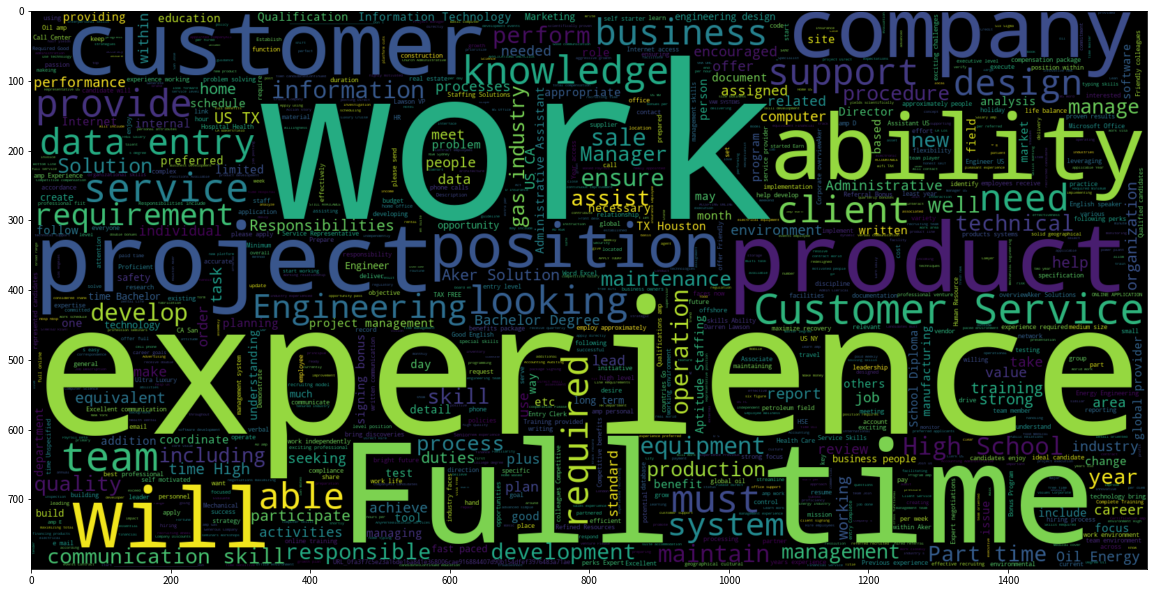

In [49]:
plt.figure(figsize = (20,20)) # Text that is fraudulent(1)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.fraudulent == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

In [50]:
X = df.clean_text
y = df.fraudulent

### Train Test Split

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

In [52]:
print(X_train)

14360    midland level dgv nvq assessor gb bir midland ...
7053     customer success manager gb lnd ebury london b...
17870    senior financial analyst retail u ca gardena p...
9228     frontend engineer ecommerce de berlin engineer...
4160     software development intern u ny new york adve...
                               ...                        
9225     senior tax professional product manager u ca s...
13123    qa engineer u ca san mateo tile one successful...
9845     senior qa engineer hyderabad information techn...
10799    customer service associate u ct hartford novit...
2732     peoplesoft hcm lead programmer analyst u pa ph...
Name: clean_text, Length: 14304, dtype: object


In [53]:
X_test

9256     interior designer architect u ca santa monica ...
3860     pre sale engineer gr athens alfavad pure value...
6190     student financial specialist u co denver metro...
13658    director finance accounting u ca san diego aya...
11231    game programmer u tx richardson immediate paid...
                               ...                        
17843    interior designer position available u ca los ...
5288     brand ambassador entry level advertising marke...
6925     military outreach consultant telecommute u ant...
6152     front end web developer gb lnd london inviting...
11512    front desk receptionist chiropractic office u ...
Name: clean_text, Length: 3576, dtype: object

### TF-IDF Vectorizer

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer(min_df=0, max_df=1, ngram_range=(1,3))
# transformed train
tfid_train = tfid.fit_transform(X_train)
# transformed test
tfid_test = tfid.transform(X_test)
print('Tfidf_train : ', tfid_train.shape)
print('Tfidf_test : ', tfid_test.shape)

Tfidf_train :  (14304, 1582119)
Tfidf_test :  (3576, 1582119)


### CountVectorizer

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train = cv.fit_transform(X_train)
#transformed test reviews
cv_test = cv.transform(X_test)

print('cv_train:',cv_train.shape)
print('cv_test:',cv_test.shape)

cv_train: (14304, 1582119)
cv_test: (3576, 1582119)


In [56]:
cv_ = CountVectorizer(max_features = 1000)
cv_text_ = cv_.fit_transform(df['clean_text'])
df3 = pd.DataFrame(cv_text_.toarray(), columns=cv_.get_feature_names())
df3

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,ab,ability,able,abroad,ac,access,account,accounting,accurate,...,working,world,worldwide,would,write,writing,written,year,york,young
0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,4,0
1,0,1,1,1,0,1,0,1,0,0,...,6,10,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,11,0,0,...,0,4,2,0,1,0,1,2,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,0,1,0,0,0,0,3,0,0,...,7,3,0,0,0,0,1,0,0,0
17876,1,0,2,1,0,0,0,2,10,0,...,0,0,0,1,0,1,0,2,0,0
17877,0,0,1,1,0,0,0,0,2,0,...,1,0,0,0,0,0,0,2,0,0
17878,0,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [57]:
tfid_train

<14304x1582119 sparse matrix of type '<class 'numpy.float64'>'
	with 1582119 stored elements in Compressed Sparse Row format>

In [58]:
Tfid_ = TfidfVectorizer(max_features = 1000)
tfid_text = Tfid_.fit_transform(df['clean_text'])
df1 = pd.DataFrame(tfid_text.toarray(), columns=Tfid_.get_feature_names())
df1

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,ab,ability,able,abroad,ac,access,account,accounting,accurate,...,working,world,worldwide,would,write,writing,written,year,york,young
0,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.051147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.201024,0.0
1,0.000000,0.0233,0.012967,0.015686,0.0,0.023042,0.0,0.020250,0.000000,0.0,...,0.070172,0.148641,0.000000,0.020118,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0000,0.024313,0.000000,0.0,0.000000,0.0,0.417647,0.000000,0.0,...,0.000000,0.111480,0.098659,0.000000,0.048607,0.000000,0.030196,0.038164,0.000000,0.0
4,0.000000,0.0000,0.000000,0.036015,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.026852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023366,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0.000000,0.0000,0.022544,0.000000,0.0,0.000000,0.0,0.105618,0.000000,0.0,...,0.142333,0.077528,0.000000,0.000000,0.000000,0.000000,0.028000,0.000000,0.000000,0.0
17876,0.055336,0.0000,0.052496,0.031752,0.0,0.000000,0.0,0.081979,0.543705,0.0,...,0.000000,0.000000,0.000000,0.040724,0.000000,0.043663,0.000000,0.041202,0.000000,0.0
17877,0.000000,0.0000,0.030185,0.036515,0.0,0.000000,0.0,0.000000,0.125053,0.0,...,0.027225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047382,0.000000,0.0
17878,0.000000,0.0000,0.000000,0.141735,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.052837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [59]:
df2 = df.copy()

In [60]:
main_df = pd.concat([df1,df2], axis=1)
main_df.head()

,aa,ab,ability,able,abroad,ac,access,account,accounting,accurate,...,york,young,telecommuting,has_company_logo,has_questions,fraudulent,text,text_len,clean_text,clean_text_len
0,0.0,0.0000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.201024,0.0,0,1,0,0,"Marketing Intern US, NY, New York Marketing We...",2710,marketing intern u ny new york marketing food ...,2030
1,0.0,0.0233,0.012967,0.015686,0.0,0.023042,0.0,0.020250,0.0,0.0,...,0.000000,0.0,0,1,0,0,"Customer Service - Cloud Video Production NZ, ...",6211,customer service cloud video production nz auc...,4356
2,0.0,0.0000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA...",2665,commissioning machinery assistant cma u ia wev...,1991
3,0.0,0.0000,0.024313,0.000000,0.0,0.000000,0.0,0.417647,0.0,0.0,...,0.000000,0.0,0,1,0,0,"Account Executive - Washington DC US, DC, Wash...",5539,account executive washington dc u dc washingto...,4462
4,0.0,0.0000,0.000000,0.036015,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS...",4042,bill review manager u fl fort worth spotsource...,3291


In [61]:
print('X : ', X.shape)
print('y : ', y.shape)

X :  (17880,)
y :  (17880,)


In [62]:
X_smote_tfid = df1
y_smote_tfid = df.fraudulent

In [63]:
print('X_smote_tfid : ', X_smote_tfid.shape)
print('y_smote_tfi : ', y_smote_tfid.shape)

X_smote_tfid :  (17880, 1000)
y_smote_tfi :  (17880,)


In [64]:
X_smote_cv = df3
y_smote_cv = df.fraudulent

In [65]:
print('X_smote_cv : ', X_smote_cv.shape)
print('y_smote_cv : ', y_smote_cv.shape)

X_smote_cv :  (17880, 1000)
y_smote_cv :  (17880,)


### SMOTE

In [66]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn import preprocessing, model_selection, pipeline
from sklearn.metrics import f1_score, roc_auc_score,roc_curve

#### SMOTE_tfid

In [67]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state=42)
X_smote_tfid,y_smote_tfid = smote.fit_resample(X_smote_tfid, y_smote_tfid)
X_smote_tfid.shape,y_smote_tfid.shape

((34028, 1000), (34028,))

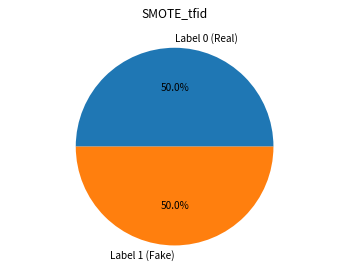

In [68]:
plt.title('SMOTE_tfid\n')
plt.pie(pd.value_counts(y_smote_tfid), 
        labels=['Label 0 (Real)', 'Label 1 (Fake)'], 
        autopct='%0.1f%%')
plt.axis('equal')
plt.show()

#### SMOTE_cv

In [69]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state=42)
X_smote_cv,y_smote_cv = smote.fit_resample(X_smote_cv, y_smote_cv)
X_smote_cv.shape,y_smote_cv.shape

((34024, 1000), (34024,))

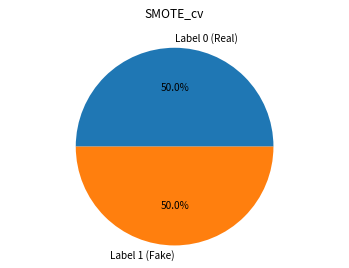

In [70]:
plt.title('SMOTE_cv\n')
plt.pie(pd.value_counts(y_smote_cv), 
        labels=['Label 0 (Real)', 'Label 1 (Fake)'], 
        autopct='%0.1f%%')
plt.axis('equal')
plt.show()

## SMOTE Train Test Split

In [71]:
X_smote_tfid_train, X_smote_tfid_test, y_smote_tfid_train, y_smote_tfid_test = train_test_split(X_smote_tfid, y_smote_tfid, test_size = 0.2 , random_state = 0)
print("X_trian:",X_smote_tfid_train.shape,"\nX_test:",X_smote_tfid_test.shape,"\ny_trian:",y_smote_tfid_train.shape,"\ny_test:",y_smote_tfid_test.shape)

X_trian: (27222, 1000) 
X_test: (6806, 1000) 
y_trian: (27222,) 
y_test: (6806,)


In [72]:
X_smote_cv_train, X_smote_cv_test, y_smote_cv_train, y_smote_cv_test = train_test_split(X_smote_cv, y_smote_cv, test_size = 0.2 , random_state = 0)
print("X_trian:",X_smote_cv_train.shape,"\nX_test:",X_smote_cv_test.shape,"\ny_trian:",y_smote_tfid_train.shape,"\ny_test:",y_smote_tfid_test.shape)

X_trian: (27219, 1000) 
X_test: (6805, 1000) 
y_trian: (27222,) 
y_test: (6806,)


## MultinomialNB

In [73]:
from sklearn.naive_bayes import MultinomialNB

# 1.tfid
mnb_smote_tfid = MultinomialNB()
mnb_smote_tfid.fit(X_smote_tfid_train, y_smote_tfid_train)
y_pred_mnb_smote_tfid = mnb_smote_tfid.predict(X_smote_tfid_test)

# 2.cv
mnb_smote_cv = MultinomialNB()
mnb_smote_cv.fit(X_smote_cv_train, y_smote_cv_train)
y_pred_mnb_smote_cv = mnb_smote_cv.predict(X_smote_cv_test)


# accuracy
print("Accuracy Score of mnb_tfid :", accuracy_score(y_pred_mnb_smote_tfid, y_smote_tfid_test), "\n") 

# confusion matrix 
print("Confusion Matrix of mnb_tfid:\n", confusion_matrix(y_smote_tfid_test, y_pred_mnb_smote_tfid), "\n")

# classifcation report
print("Classification Report of mnb_tfid:\n", classification_report(y_smote_tfid_test, y_pred_mnb_smote_tfid), "\n")

print('-'*100,'\n')

# accuracy
print("Accuracy Score of mnb_cv :", accuracy_score(y_smote_cv_test, y_pred_mnb_smote_cv ), "\n") 

# confusion matrix 
print("Confusion Matrix of mnb_cv:\n", confusion_matrix(y_smote_cv_test, y_pred_mnb_smote_cv ), "\n")

# classifcation report
print("Classification Report of mnb_cv:\n", classification_report(y_smote_cv_test, y_pred_mnb_smote_cv ), "\n")


Accuracy Score of mnb_tfid : 0.8812812224507788 

Confusion Matrix of mnb_tfid:
 [[2906  459]
 [ 349 3092]] 

Classification Report of mnb_tfid:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88      3365
           1       0.87      0.90      0.88      3441

    accuracy                           0.88      6806
   macro avg       0.88      0.88      0.88      6806
weighted avg       0.88      0.88      0.88      6806
 

---------------------------------------------------------------------------------------------------- 

Accuracy Score of mnb_cv : 0.8939015429831006 

Confusion Matrix of mnb_cv:
 [[3182  220]
 [ 502 2901]] 

Classification Report of mnb_cv:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      3402
           1       0.93      0.85      0.89      3403

    accuracy                           0.89      6805
   macro avg       0.90      0.89      0.89      6805
weighted a

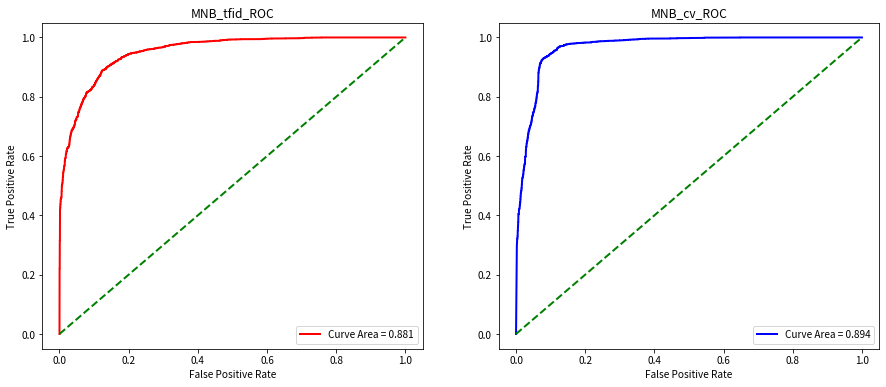

In [74]:
fpr, tpr, thr = roc_curve(y_smote_tfid_test, mnb_smote_tfid.predict_proba(X_smote_tfid_test)[:,1])
fpr2, tpr2, thr2 = roc_curve(y_smote_cv_test, mnb_smote_cv.predict_proba(X_smote_cv_test)[:,1])

#auc = auc(fpr, tpr)
auc = roc_auc_score(y_smote_tfid_test, y_pred_mnb_smote_tfid )
auc2 = roc_auc_score(y_smote_cv_test, y_pred_mnb_smote_cv )
lw = 2

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(fpr, tpr, color='red', lw=lw, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MNB_tfid_ROC')
plt.legend(loc="lower right")

plt.subplot(122)
plt.plot(fpr2, tpr2, color='b', lw=lw, label="Curve Area = %0.3f" % auc2)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MNB_cv_ROC')
plt.legend(loc="lower right")

plt.show()

## Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

# 1.tfid
LogR_smote_tfid = LogisticRegression()
LogR_smote_tfid.fit(X_smote_tfid_train, y_smote_tfid_train)
y_pred_LogR_smote_tfid = LogR_smote_tfid.predict(X_smote_tfid_test)

# 2.cv
LogR_smote_cv = LogisticRegression()
LogR_smote_cv.fit(X_smote_cv_train, y_smote_cv_train)
y_pred_LogR_smote_cv = LogR_smote_cv.predict(X_smote_cv_test)


# accuracy
print("Accuracy Score of LogR_tfid :", accuracy_score(y_pred_LogR_smote_tfid, y_smote_tfid_test), "\n") 

# confusion matrix 
print("Confusion Matrix of LogR_tfid:\n", confusion_matrix(y_smote_tfid_test, y_pred_LogR_smote_tfid), "\n")

# classifcation report
print("Classification Report of LogR_tfid:\n", classification_report(y_smote_tfid_test, y_pred_LogR_smote_tfid), "\n")

print('-'*100)

# accuracy
print("Accuracy Score of LogR_cv :", accuracy_score(y_smote_cv_test, y_pred_LogR_smote_cv ), "\n") 

# confusion matrix 
print("Confusion Matrix of LogR_cv:\n", confusion_matrix(y_smote_cv_test, y_pred_LogR_smote_cv ), "\n")

# classifcation report
print("Classification Report of LogR_cv:\n", classification_report(y_smote_cv_test, y_pred_LogR_smote_cv ), "\n")


Accuracy Score of LogR_tfid : 0.9641492800470174 

Confusion Matrix of LogR_tfid:
 [[3206  159]
 [  85 3356]] 

Classification Report of LogR_tfid:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      3365
           1       0.95      0.98      0.96      3441

    accuracy                           0.96      6806
   macro avg       0.96      0.96      0.96      6806
weighted avg       0.96      0.96      0.96      6806
 

----------------------------------------------------------------------------------------------------
Accuracy Score of LogR_cv : 0.9813372520205731 

Confusion Matrix of LogR_cv:
 [[3307   95]
 [  32 3371]] 

Classification Report of LogR_cv:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3402
           1       0.97      0.99      0.98      3403

    accuracy                           0.98      6805
   macro avg       0.98      0.98      0.98      6805
weight

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


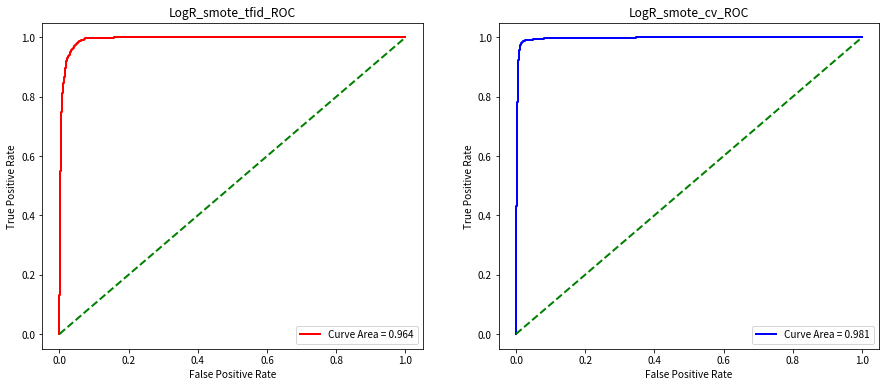

In [76]:
fpr, tpr, thr = roc_curve(y_smote_tfid_test, LogR_smote_tfid.predict_proba(X_smote_tfid_test)[:,1])
fpr2, tpr2, thr2 = roc_curve(y_smote_cv_test, LogR_smote_cv.predict_proba(X_smote_cv_test)[:,1])

#auc = auc(fpr, tpr)
auc = roc_auc_score(y_smote_tfid_test, y_pred_LogR_smote_tfid )
auc2 = roc_auc_score(y_smote_cv_test, y_pred_LogR_smote_cv )
lw = 2

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(fpr, tpr, color='red', lw=lw, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogR_smote_tfid_ROC')
plt.legend(loc="lower right")

plt.subplot(122)
plt.plot(fpr2, tpr2, color='b', lw=lw, label="Curve Area = %0.3f" % auc2)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogR_smote_cv_ROC')
plt.legend(loc="lower right")

plt.show()

## KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier

# 1.tfid
KNN_smote_tfid = KNeighborsClassifier(n_neighbors=2)
KNN_smote_tfid.fit(X_smote_tfid_train, y_smote_tfid_train)
y_pred_KNN_smote_tfid = KNN_smote_tfid.predict(X_smote_tfid_test)

# 2.cv
KNN_smote_cv = KNeighborsClassifier(n_neighbors=2)
KNN_smote_cv.fit(X_smote_cv_train, y_smote_cv_train)
y_pred_KNN_smote_cv = KNN_smote_cv.predict(X_smote_cv_test)


# accuracy
print("Accuracy Score of KNN_tfid :", accuracy_score(y_pred_KNN_smote_tfid, y_smote_tfid_test), "\n") 

# confusion matrix 
print("Confusion Matrix of KNN_tfid:\n", confusion_matrix(y_smote_tfid_test, y_pred_KNN_smote_tfid), "\n")

# classifcation report
print("Classification Report of KNN_tfid:\n", classification_report(y_smote_tfid_test, y_pred_KNN_smote_tfid), "\n")

print('-'*100,'\n')

# accuracy
print("Accuracy Score of KNN_cv :", accuracy_score(y_smote_cv_test, y_pred_KNN_smote_cv ), "\n") 

# confusion matrix 
print("Confusion Matrix of KNN_cv:\n", confusion_matrix(y_smote_cv_test, y_pred_KNN_smote_cv ), "\n")

# classifcation report
print("Classification Report of KNN_cv:\n", classification_report(y_smote_cv_test, y_pred_KNN_smote_cv ), "\n")

Accuracy Score of KNN_tfid : 0.942844548927417 

Confusion Matrix of KNN_tfid:
 [[2976  389]
 [   0 3441]] 

Classification Report of KNN_tfid:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94      3365
           1       0.90      1.00      0.95      3441

    accuracy                           0.94      6806
   macro avg       0.95      0.94      0.94      6806
weighted avg       0.95      0.94      0.94      6806
 

---------------------------------------------------------------------------------------------------- 

Accuracy Score of KNN_cv : 0.9418074944893461 

Confusion Matrix of KNN_cv:
 [[3007  395]
 [   1 3402]] 

Classification Report of KNN_cv:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94      3402
           1       0.90      1.00      0.94      3403

    accuracy                           0.94      6805
   macro avg       0.95      0.94      0.94      6805
weighted av

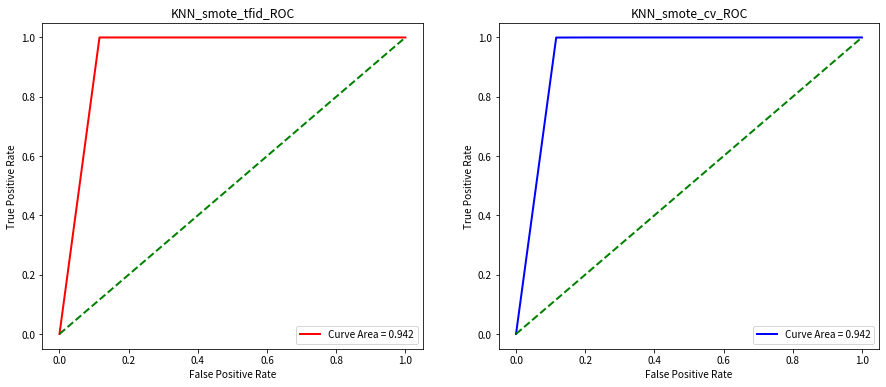

In [78]:
fpr, tpr, thr = roc_curve(y_smote_tfid_test, KNN_smote_tfid.predict_proba(X_smote_tfid_test)[:,1])
fpr2, tpr2, thr2 = roc_curve(y_smote_cv_test, KNN_smote_cv.predict_proba(X_smote_cv_test)[:,1])

#auc = auc(fpr, tpr)
auc = roc_auc_score(y_smote_tfid_test, y_pred_KNN_smote_tfid )
auc2 = roc_auc_score(y_smote_cv_test, y_pred_KNN_smote_cv )
lw = 2

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(fpr, tpr, color='red', lw=lw, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN_smote_tfid_ROC')
plt.legend(loc="lower right")

plt.subplot(122)
plt.plot(fpr2, tpr2, color='b', lw=lw, label="Curve Area = %0.3f" % auc2)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN_smote_cv_ROC')
plt.legend(loc="lower right")

plt.show()

## ANN

In [79]:
from sklearn import neural_network

# 1.tfid
ANN_smote_tfid = neural_network.MLPClassifier(early_stopping=True)
ANN_smote_tfid.fit(X_smote_tfid_train, y_smote_tfid_train)
y_pred_ANN_smote_tfid = ANN_smote_tfid.predict(X_smote_tfid_test)

# 2.cv
ANN_smote_cv = neural_network.MLPClassifier(early_stopping=True)
ANN_smote_cv.fit(X_smote_cv_train, y_smote_cv_train)
y_pred_ANN_smote_cv = ANN_smote_cv.predict(X_smote_cv_test)


# accuracy
print("Accuracy Score of ANN_tfid :", accuracy_score(y_pred_ANN_smote_tfid, y_smote_tfid_test), "\n") 

# confusion matrix 
print("Confusion Matrix of ANN_tfid:\n", confusion_matrix(y_smote_tfid_test, y_pred_ANN_smote_tfid), "\n")

# classifcation report
print("Classification Report of ANN_tfid:\n", classification_report(y_smote_tfid_test, y_pred_ANN_smote_tfid), "\n")

print('-'*100,'\n')

# accuracy
print("Accuracy Score of ANN_cv :", accuracy_score(y_smote_cv_test, y_pred_ANN_smote_cv ), "\n") 

# confusion matrix 
print("Confusion Matrix of ANN_cv:\n", confusion_matrix(y_smote_cv_test, y_pred_ANN_smote_cv ), "\n")

# classifcation report
print("Classification Report of ANN_cv:\n", classification_report(y_smote_cv_test, y_pred_ANN_smote_cv ), "\n")

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifi

Accuracy Score of ANN_tfid : 0.9904496032912137 

Confusion Matrix of ANN_tfid:
 [[3302   63]
 [   2 3439]] 

Classification Report of ANN_tfid:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3365
           1       0.98      1.00      0.99      3441

    accuracy                           0.99      6806
   macro avg       0.99      0.99      0.99      6806
weighted avg       0.99      0.99      0.99      6806
 

---------------------------------------------------------------------------------------------------- 

Accuracy Score of ANN_cv : 0.9894195444526084 

Confusion Matrix of ANN_cv:
 [[3355   47]
 [  25 3378]] 

Classification Report of ANN_cv:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3402
           1       0.99      0.99      0.99      3403

    accuracy                           0.99      6805
   macro avg       0.99      0.99      0.99      6805
weighted a

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


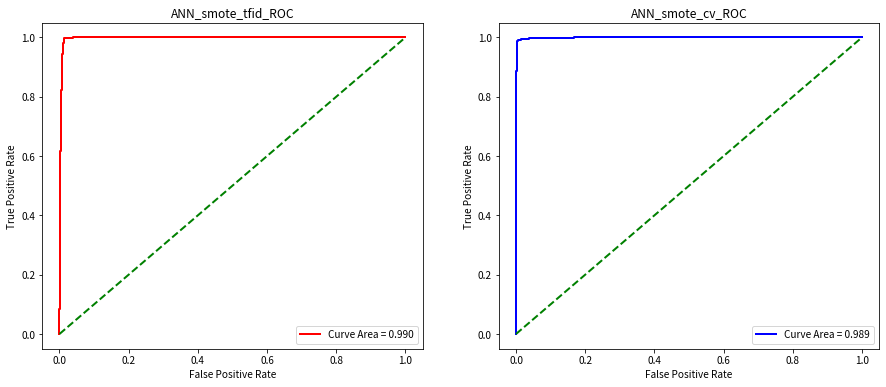

In [80]:
fpr, tpr, thr = roc_curve(y_smote_tfid_test, ANN_smote_tfid.predict_proba(X_smote_tfid_test)[:,1])
fpr2, tpr2, thr2 = roc_curve(y_smote_cv_test, ANN_smote_cv.predict_proba(X_smote_cv_test)[:,1])

#auc = auc(fpr, tpr)
auc = roc_auc_score(y_smote_tfid_test, y_pred_ANN_smote_tfid )
auc2 = roc_auc_score(y_smote_cv_test, y_pred_ANN_smote_cv )
lw = 2

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(fpr, tpr, color='red', lw=lw, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN_smote_tfid_ROC')
plt.legend(loc="lower right")

plt.subplot(122)
plt.plot(fpr2, tpr2, color='b', lw=lw, label="Curve Area = %0.3f" % auc2)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN_smote_cv_ROC')
plt.legend(loc="lower right")

plt.show()

In [81]:
predictions1 = {'LR_tfid': y_pred_LogR_smote_tfid, 'KNN_tfid': y_pred_KNN_smote_tfid, 'MNB_tfid': y_pred_mnb_smote_tfid, 'ANN': y_pred_ANN_smote_tfid }

In [82]:
predictions2 = {'LR_cv': y_pred_LogR_smote_cv, 'KNN_cv': y_pred_KNN_smote_cv, 'MNB_cv': y_pred_mnb_smote_cv, 'ANN': y_pred_ANN_smote_cv }

                                       fpr                            tpr  \
models                                                                      
LR_tfid    [0.0, 0.04725111441307578, 1.0]  [0.0, 0.975297878523685, 1.0]   
KNN_tfid   [0.0, 0.11560178306092125, 1.0]                [0.0, 1.0, 1.0]   
MNB_tfid    [0.0, 0.1364041604754829, 1.0]  [0.0, 0.898575995350189, 1.0]   
ANN_tfid  [0.0, 0.018722139673105497, 1.0]  [0.0, 0.999418773612322, 1.0]   

               auc  
models              
LR_tfid   0.964023  
KNN_tfid  0.942199  
MNB_tfid  0.881086  
ANN_tfid  0.990348  


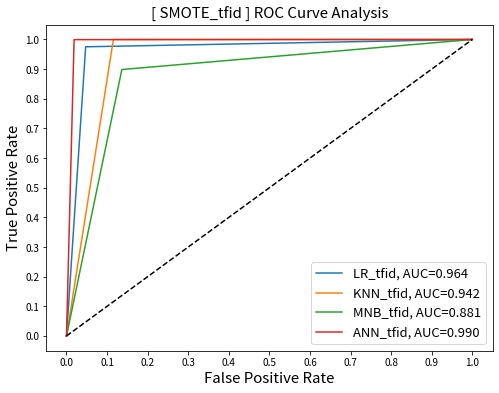

In [83]:
from sklearn.metrics import roc_curve, roc_auc_score

results_table = pd.DataFrame(columns = ['models', 'fpr','tpr','auc'])

predictions1 = {'LR_tfid': y_pred_LogR_smote_tfid, 'KNN_tfid': y_pred_KNN_smote_tfid,
                'MNB_tfid': y_pred_mnb_smote_tfid, 'ANN_tfid': y_pred_ANN_smote_tfid }

for key in predictions1:
    fpr, tpr, _ = roc_curve(y_smote_tfid_test, predictions1[key])
    auc = roc_auc_score(y_smote_tfid_test, predictions1[key])
    
    results_table = results_table.append({'models': key,
                          'fpr' : fpr,
                          'tpr' : tpr,
                          'auc' : auc}, ignore_index=True)
    
results_table.set_index('models', inplace=True)

print(results_table)

fig = plt.figure(figsize = (8,6))

for i in results_table.index:
    plt.plot(results_table.loc[i]['fpr'], 
             results_table.loc[i]['tpr'], 
             label = "{}, AUC={:.3f}".format(i, results_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color = 'black', linestyle = '--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('[ SMOTE_tfid ] ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop = {'size':13}, loc = 'lower right')

plt.show()

                                     fpr                             tpr  \
models                                                                     
LR_cv    [0.0, 0.02792475014697237, 1.0]  [0.0, 0.9905965324713488, 1.0]   
KNN_cv   [0.0, 0.11610817166372722, 1.0]  [0.0, 0.9997061416397296, 1.0]   
MNB_cv   [0.0, 0.06466784244562022, 1.0]  [0.0, 0.8524831031442844, 1.0]   
ANN_cv  [0.0, 0.013815402704291593, 1.0]  [0.0, 0.9926535409932412, 1.0]   

             auc  
models            
LR_cv   0.981336  
KNN_cv  0.941799  
MNB_cv  0.893908  
ANN_cv  0.989419  


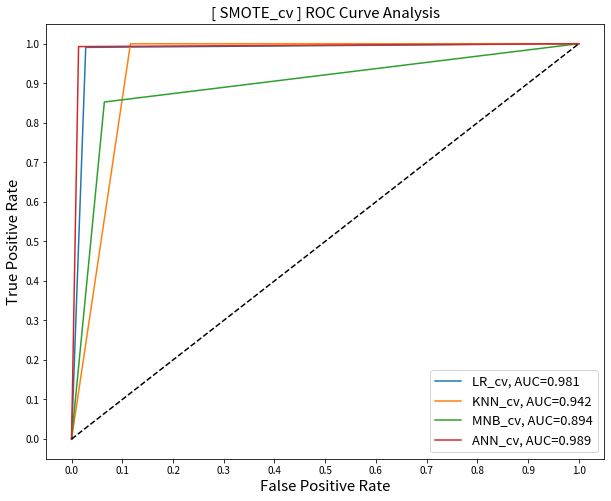

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score

results_table = pd.DataFrame(columns = ['models', 'fpr','tpr','auc'])

predictions2 = {'LR_cv': y_pred_LogR_smote_cv, 'KNN_cv': y_pred_KNN_smote_cv, 'MNB_cv': y_pred_mnb_smote_cv, 'ANN_cv': y_pred_ANN_smote_cv }

for key in predictions2:
    fpr, tpr, _ = roc_curve(y_smote_cv_test, predictions2[key])
    auc = roc_auc_score(y_smote_cv_test, predictions2[key])
    
    results_table = results_table.append({'models': key,
                          'fpr' : fpr,
                          'tpr' : tpr,
                          'auc' : auc}, ignore_index=True)
    
results_table.set_index('models', inplace=True)

print(results_table)

fig = plt.figure(figsize = (10,8))

for i in results_table.index:
    plt.plot(results_table.loc[i]['fpr'], 
             results_table.loc[i]['tpr'], 
             label = "{}, AUC={:.3f}".format(i, results_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color = 'black', linestyle = '--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('[ SMOTE_cv ] ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop = {'size':13}, loc = 'lower right')

plt.show()

### MultinomialNB

In [85]:
from sklearn.naive_bayes import MultinomialNB

# 1.tfid
mnb_tfid = MultinomialNB()
mnb_tfid.fit(tfid_train, y_train)
y_pred_mnb_tfid = mnb_tfid.predict(tfid_test)

# 2.cv
mnb_cv = MultinomialNB()
mnb_cv.fit(cv_train, y_train)
y_pred_mnb_cv = mnb_cv.predict(cv_test)


# accuracy
print("Accuracy Score of mnb_tfid :", accuracy_score(y_pred_mnb_tfid, y_test), "\n") 

# confusion matrix 
print("Confusion Matrix of mnb_tfid:\n", confusion_matrix(y_test, y_pred_mnb_tfid), "\n")

# classifcation report
print("Classification Report of mnb_tfid:\n", classification_report(y_test, y_pred_mnb_tfid), "\n")

print('-'*100,'\n')

# accuracy
print("Accuracy Score of mnb_cv :", accuracy_score(y_pred_mnb_cv, y_test), "\n") 

# confusion matrix 
print("Confusion Matrix of mnb_cv:\n", confusion_matrix(y_test, y_pred_mnb_cv), "\n")

# classifcation report
print("Classification Report of mnb_cv:\n", classification_report(y_test, y_pred_mnb_cv), "\n")


Accuracy Score of mnb_tfid : 0.9572147651006712 

Confusion Matrix of mnb_tfid:
 [[3423    0]
 [ 153    0]] 

Classification Report of mnb_tfid:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3423
           1       0.00      0.00      0.00       153

    accuracy                           0.96      3576
   macro avg       0.48      0.50      0.49      3576
weighted avg       0.92      0.96      0.94      3576
 

---------------------------------------------------------------------------------------------------- 

Accuracy Score of mnb_cv : 0.9639261744966443 

Confusion Matrix of mnb_cv:
 [[3359   64]
 [  65   88]] 

Classification Report of mnb_cv:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3423
           1       0.58      0.58      0.58       153

    accuracy                           0.96      3576
   macro avg       0.78      0.78      0.78      3576
weighted a

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


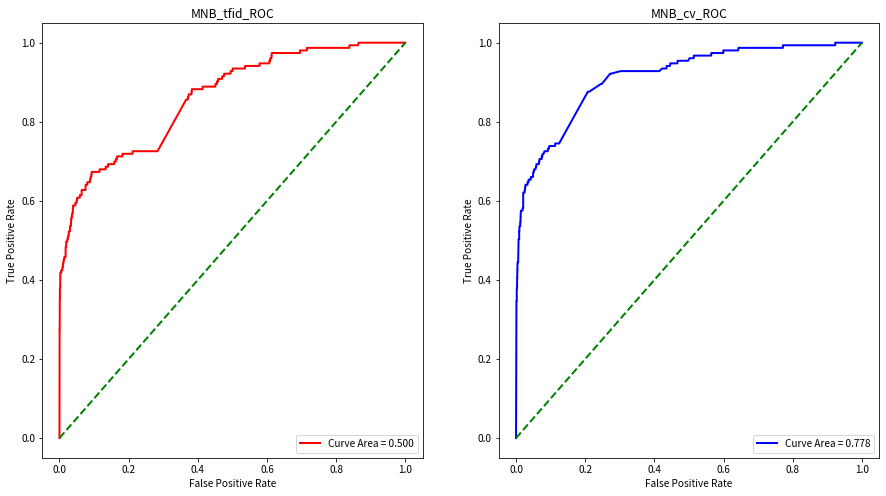

In [86]:
fpr, tpr, thr = roc_curve(y_test, mnb_tfid.predict_proba(tfid_test)[:,1])
fpr2, tpr2, thr2 = roc_curve(y_test, mnb_cv.predict_proba(cv_test)[:,1])

#auc = auc(fpr, tpr)
auc = roc_auc_score(y_test, y_pred_mnb_tfid)
auc2 = roc_auc_score(y_test, y_pred_mnb_cv)
lw = 2

plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.plot(fpr, tpr, color='red', lw=lw, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MNB_tfid_ROC')
plt.legend(loc="lower right")

plt.subplot(122)
plt.plot(fpr2, tpr2, color='b', lw=lw, label="Curve Area = %0.3f" % auc2)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MNB_cv_ROC')
plt.legend(loc="lower right")

plt.show()

### Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

# 1.tfid
LR_tfid = LogisticRegression()
LR_tfid.fit(tfid_train, y_train)
y_pred_LR_tfid = LR_tfid.predict(tfid_test)

# 2.cv
LR_cv = LogisticRegression()
LR_cv.fit(cv_train, y_train)
y_pred_LR_cv = LR_cv.predict(cv_test)


# accuracy
print("Accuracy Score of LR_tfid :", accuracy_score(y_pred_LR_tfid, y_test), "\n") 

# confusion matrix 
print("Confusion Matrix of LR_tfid:\n", confusion_matrix(y_test, y_pred_LR_tfid), "\n")

# classifcation report
print("Classification Report of LR_tfid:\n", classification_report(y_test, y_pred_LR_tfid), "\n")

print('-'*100,'\n')

# accuracy
print("Accuracy Score of LR_cv :", accuracy_score(y_pred_LR_cv, y_test), "\n") 

# confusion matrix 
print("Confusion Matrix of LR_cv:\n", confusion_matrix(y_test, y_pred_LR_cv), "\n")

# classifcation report
print("Classification Report of LR_cv:\n", classification_report(y_test, y_pred_LR_cv), "\n")

Accuracy Score of LR_tfid : 0.9572147651006712 

Confusion Matrix of LR_tfid:
 [[3423    0]
 [ 153    0]] 

Classification Report of LR_tfid:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3423
           1       0.00      0.00      0.00       153

    accuracy                           0.96      3576
   macro avg       0.48      0.50      0.49      3576
weighted avg       0.92      0.96      0.94      3576
 

---------------------------------------------------------------------------------------------------- 

Accuracy Score of LR_cv : 0.9681208053691275 

Confusion Matrix of LR_cv:
 [[3422    1]
 [ 113   40]] 

Classification Report of LR_cv:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3423
           1       0.98      0.26      0.41       153

    accuracy                           0.97      3576
   macro avg       0.97      0.63      0.70      3576
weighted avg    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


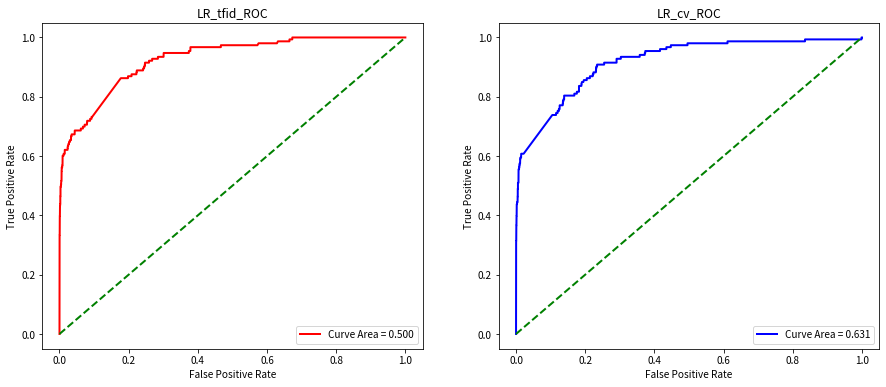

In [88]:
fpr, tpr, thr = roc_curve(y_test, LR_tfid.predict_proba(tfid_test)[:,1])
fpr2, tpr2, thr2 = roc_curve(y_test, LR_cv.predict_proba(cv_test)[:,1])

#auc = auc(fpr, tpr)
auc = roc_auc_score(y_test, y_pred_LR_tfid)
auc2 = roc_auc_score(y_test, y_pred_LR_cv)
lw = 2

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(fpr, tpr, color='red', lw=lw, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR_tfid_ROC')
plt.legend(loc="lower right")

plt.subplot(122)
plt.plot(fpr2, tpr2, color='b', lw=lw, label="Curve Area = %0.3f" % auc2)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR_cv_ROC')
plt.legend(loc="lower right")

plt.show()

## KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier

# 1.tfid
KNN_tfid = KNeighborsClassifier(n_neighbors = 1)
KNN_tfid.fit(tfid_train, y_train)
y_pred_KNN_tfid = KNN_tfid.predict(tfid_test)

# 2.cv
KNN_cv = KNeighborsClassifier(n_neighbors = 1)
KNN_cv.fit(cv_train, y_train)
y_pred_KNN_cv = KNN_cv.predict(cv_test)


# accuracy
print("Accuracy Score of KNN_tfid :", accuracy_score(y_pred_KNN_tfid, y_test), "\n") 

# confusion matrix 
print("Confusion Matrix of KNN_tfid:\n", confusion_matrix(y_test, y_pred_KNN_tfid), "\n")

# classifcation report
print("Classification Report of KNN_tfid:\n", classification_report(y_test, y_pred_KNN_tfid), "\n")

print('-'*100,'\n')

# accuracy
print("Accuracy Score of KNN_cv :", accuracy_score(y_pred_KNN_cv, y_test), "\n") 

# confusion matrix 
print("Confusion Matrix of KNN_cv:\n", confusion_matrix(y_test, y_pred_KNN_cv), "\n")

# classifcation report
print("Classification Report of KNN_cv:\n", classification_report(y_test, y_pred_KNN_cv), "\n")

Accuracy Score of KNN_tfid : 0.9720357941834452 

Confusion Matrix of KNN_tfid:
 [[3421    2]
 [  98   55]] 

Classification Report of KNN_tfid:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3423
           1       0.96      0.36      0.52       153

    accuracy                           0.97      3576
   macro avg       0.97      0.68      0.75      3576
weighted avg       0.97      0.97      0.97      3576
 

---------------------------------------------------------------------------------------------------- 

Accuracy Score of KNN_cv : 0.9695190156599552 

Confusion Matrix of KNN_cv:
 [[3421    2]
 [ 107   46]] 

Classification Report of KNN_cv:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3423
           1       0.96      0.30      0.46       153

    accuracy                           0.97      3576
   macro avg       0.96      0.65      0.72      3576
weighted a

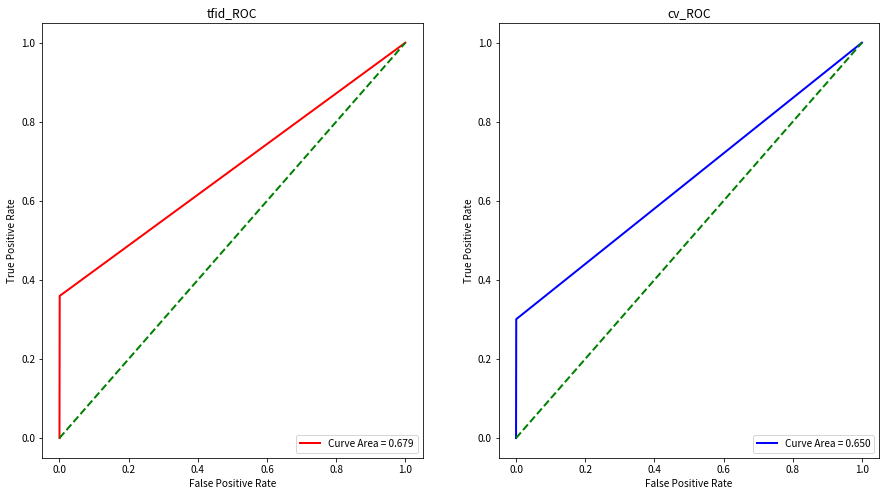

In [90]:
fpr, tpr, thr = roc_curve(y_test, KNN_tfid.predict_proba(tfid_test)[:,1])
fpr2, tpr2, thr2 = roc_curve(y_test, KNN_cv.predict_proba(cv_test)[:,1])

#auc = auc(fpr, tpr)
auc = roc_auc_score(y_test, y_pred_KNN_tfid)
auc2 = roc_auc_score(y_test, y_pred_KNN_cv)
lw = 2

plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.plot(fpr, tpr, color='red', lw=lw, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('tfid_ROC')
plt.legend(loc="lower right")

plt.subplot(122)
plt.plot(fpr2, tpr2, color='b', lw=lw, label="Curve Area = %0.3f" % auc2)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('cv_ROC')
plt.legend(loc="lower right")

plt.show()

## ANN 

In [91]:
# from sklearn import neural_network

# # 1.tfid
# ANN_tfid = neural_network.MLPClassifier(early_stopping=True)
# ANN_tfid.fit(tfid_train, y_train)
# y_pred_ANN_tfid = ANN_tfid.predict(tfid_test)

# # 2.cv
# ANN_cv = neural_network.MLPClassifier(early_stopping=True)
# ANN_cv.fit(cv_train, y_train)
# y_pred_ANN_cv = ANN_cv.predict(cv_test)


# # accuracy
# print("Accuracy Score of ANN_tfid :", accuracy_score(y_pred_ANN_tfid, y_test), "\n") 

# # confusion matrix 
# print("Confusion Matrix of ANN_tfid:\n", confusion_matrix(y_test, y_pred_ANN_tfid), "\n")

# # classifcation report
# print("Classification Report of ANN_tfid:\n", classification_report(y_test, y_pred_ANN_tfid), "\n")

# print('-'*100,'\n')

# # accuracy
# print("Accuracy Score of ANN_cv :", accuracy_score(y_pred_ANN_cv, y_test), "\n") 

# # confusion matrix 
# print("Confusion Matrix of ANN_cv:\n", confusion_matrix(y_test, y_pred_ANN_cv), "\n")

# # classifcation report
# print("Classification Report of ANN_cv:\n", classification_report(y_test, y_pred_ANN_cv), "\n")

# print('-'*100,'\n')

In [92]:
# # fpr, tpr, thr = roc_curve(y_test, ANN_tfid.predict_proba(tfid_test)[:,1])
# fpr2, tpr2, thr2 = roc_curve(y_test, ANN_cv.predict_proba(cv_test)[:,1])

# #auc = auc(fpr, tpr)
# # auc = roc_auc_score(y_test, y_pred_ANN_tfid)
# auc2 = roc_auc_score(y_test, y_pred_ANN_cv)
# lw = 2

# plt.figure(figsize=(15, 8))
# # plt.subplot(121)
# # plt.plot(fpr, tpr, color='red', lw=lw, label="Curve Area = %0.3f" % auc)
# # plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
# # plt.xlabel('False Positive Rate')
# # plt.ylabel('True Positive Rate')
# # plt.title('tfid_ROC')
# # plt.legend(loc="lower right")

# plt.subplot(122)
# plt.plot(fpr2, tpr2, color='b', lw=lw, label="Curve Area = %0.3f" % auc2)
# plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('cv_ROC')
# plt.legend(loc="lower right")

# plt.show()

                                         fpr                              tpr  \
models                                                                          
LR_tfid                           [0.0, 1.0]                       [0.0, 1.0]   
LR_cv     [0.0, 0.00029214139643587495, 1.0]  [0.0, 0.26143790849673204, 1.0]   
KNN_tfid   [0.0, 0.0005842827928717499, 1.0]  [0.0, 0.35947712418300654, 1.0]   
KNN_cv     [0.0, 0.0005842827928717499, 1.0]   [0.0, 0.3006535947712418, 1.0]   
MNB_tfid                          [0.0, 1.0]                       [0.0, 1.0]   
MNB_cv      [0.0, 0.018697049371895997, 1.0]   [0.0, 0.5751633986928104, 1.0]   

               auc  
models              
LR_tfid   0.500000  
LR_cv     0.630573  
KNN_tfid  0.679446  
KNN_cv    0.650035  
MNB_tfid  0.500000  
MNB_cv    0.778233  


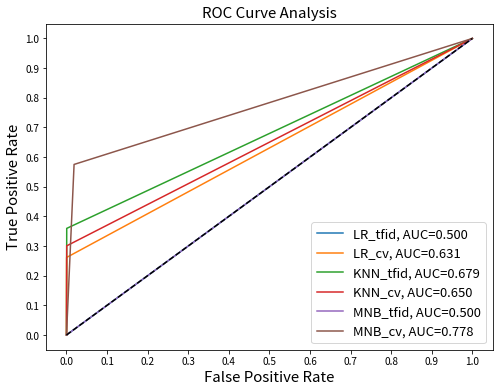

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score

results_table = pd.DataFrame(columns = ['models', 'fpr','tpr','auc'])

predictions = {'LR_tfid': y_pred_LR_tfid, 'LR_cv': y_pred_LR_cv, 'KNN_tfid': y_pred_KNN_tfid, 'KNN_cv': y_pred_KNN_cv,
          'MNB_tfid': y_pred_mnb_tfid, 'MNB_cv': y_pred_mnb_cv }

for key in predictions:
    fpr, tpr, _ = roc_curve(y_test, predictions[key])
    auc = roc_auc_score(y_test, predictions[key])
    
    results_table = results_table.append({'models': key,
                          'fpr' : fpr,
                          'tpr' : tpr,
                          'auc' : auc}, ignore_index=True)
    
results_table.set_index('models', inplace=True)

print(results_table)

fig = plt.figure(figsize = (8,6))

for i in results_table.index:
    plt.plot(results_table.loc[i]['fpr'], 
             results_table.loc[i]['tpr'], 
             label = "{}, AUC={:.3f}".format(i, results_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color = 'black', linestyle = '--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop = {'size':13}, loc = 'lower right')

plt.show()

## Bert

In [94]:
# !pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 250 kB 29.7 MB/s 
     |████████████████████████████████| 7.6 MB 59.2 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 9.2 MB 70.6 MB/s 
     |████████████████████████████████| 1.3 MB 52.1 MB/s 
     |████████████████████████████████| 1.9 MB 76.5 MB/s 
     |████████████████████████████████| 451 kB 83.6 MB/s 
     |████████████████████████████████| 5.8 MB 57.2 MB/s 
     |████████████████████████████████| 182 kB 81.3 MB/s 
     |████████████████████████████████| 182 kB 81.3 MB/s 
     |████████████████████████████████| 168 kB 82.0 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 168 kB 58.5 MB/s 
     |████████████████████████████████| 166 kB 84.8 MB/s 
     |████████████████████████████████| 166 kB 81.1 MB/s 
     |█████████████████████████████

In [95]:
from simpletransformers.classification import ClassificationModel

model = ClassificationModel('bert','hfl/english-pert-base')


Downloading:   0%|          | 0.00/555 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at hfl/english-pert-base were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [96]:
# df.head()

In [97]:
# new_df = df.clean_text

In [98]:
# new_df = pd.DataFrame(new_df)
# new_df['fraudulent'] = df.fraudulent
# new_df

In [99]:
# new_df.shape

In [100]:
# Bert_train , Bert_test = train_test_split(new_df , test_size = 0.2 , random_state = 26)

In [106]:
# from simpletransformers.classification import ClassificationModel

# model_args = {"num_train_epochs": 1 ,"learning_rate": 1e-4,}

# # 1.tfid
# bert_smote_tfid = ClassificationModel("bert","bert-base-cased",args=model_args,)
# bert_smote_tfid.train_model(X_smote_tfid_train, y_smote_tfid_train)
# y_pred_bert_smote_tfid = bert_smote_tfid.eval_model(y_smote_tfid_test)

# # 2.cv
# bert_smote_cv = ClassificationModel("bert","bert-base-cased",args=model_args,)
# bert_smote_cv.train_model(X_smote_cv_train, y_smote_cv_train)
# y_pred_bert_smote_cv = bert_smote_cv.eval_model(X_smote_cv_test)


# accuracy
# print("Accuracy Score of bert_tfid :", accuracy_score(y_pred_bert_smote_tfid, y_smote_tfid_test), "\n") 

# # confusion matrix 
# print("Confusion Matrix of bert_tfid:\n", confusion_matrix(y_smote_tfid_test, y_pred_bert_smote_tfid), "\n")

# # classifcation report
# print("Classification Report of bert_tfid:\n", classification_report(y_smote_tfid_test, y_pred_bert_smote_tfid), "\n")

# print('-'*100,'\n')

# # accuracy
# print("Accuracy Score of bert_cv :", accuracy_score(y_smote_cv_test, y_pred_bert_smote_cv ), "\n") 

# # confusion matrix 
# print("Confusion Matrix of bert_cv:\n", confusion_matrix(y_smote_cv_test, y_pred_bert_smote_cv ), "\n")

# # classifcation report
# print("Classification Report of bert_cv:\n", classification_report(y_smote_cv_test, y_pred_bert_smote_cv ), "\n")

In [107]:
# y_pred_bert_smote_tfid

In [108]:
# model.train_model(Bert_train ,output_dir='real_fake')

In [109]:
# model.eval_model(Bert_test)